In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

from model import MLPModel, MLPConfig, EigModel
from utils import define_scheduler_lambda


In [2]:
scheduler_epochs = [4, 6, 10]
scheduler_lambda = define_scheduler_lambda(*scheduler_epochs, min_lambda = 0.03, steps_per = 2)

config = MLPConfig(d_model = 50, 
                   n_layer = 3,
                    weight_decay = 0.5,
                    latent_noise = 0.33, 
                    input_noise = 0.0,
                    normalization = 'rms',
                    epochs=sum(scheduler_epochs) + 10, 
                    scheduler_lambda=scheduler_lambda)
model = MLPModel(config).to('mps')

In [4]:
model.fit()

Evaluation | Accuracy: 8.69 %, Loss: 2.3349
Epoch [1/30], Step [100/600], loss: 2.2836
Epoch [1/30], Step [200/600], loss: 2.2085
Epoch [1/30], Step [300/600], loss: 2.1067
Epoch [1/30], Step [400/600], loss: 1.8875


KeyboardInterrupt: 

In [8]:
model.save_pretrained('saved_model')

TypeError: Object of type function is not JSON serializable

In [ ]:
eigmodel = EigModel(model).to('mps')
eigmodel.device

device(type='mps', index=0)

In [ ]:
eigmodel.config.beta_temp = 1
eigmodel.validation()

Evaluation | Accuracy: 98.40 %, Loss: 1.9200


(98.4, 1.9199962317943573)

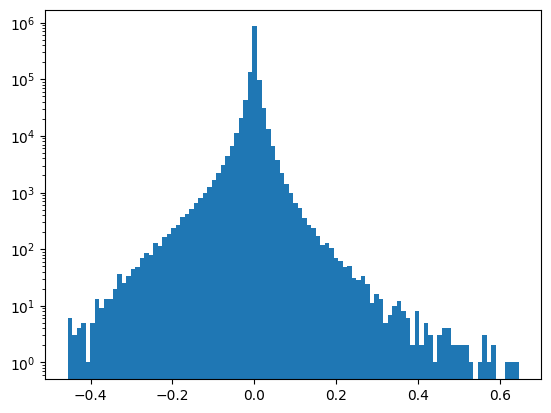

In [ ]:
eff_eigvals = eigmodel.eff_eigvals
plt.hist(eff_eigvals.flatten(), bins=100)
plt.yscale('log')

(49, 1, 0)
tensor(0.4672)


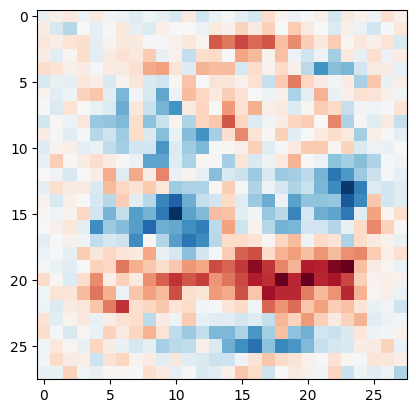

In [ ]:
idx = 1

root_idx = (1,)
eigvals = eff_eigvals[root_idx]
topk = eigvals.flatten().topk(100)
topk_idxs= torch.unravel_index(topk.indices, eigvals.shape)
eigvec_idxs = tuple(topk_idxs[i][idx].item() for i in range(len(eigvals.shape)))
print(eigvec_idxs)
print(eigvals[eigvec_idxs])
eigvec = eigmodel.layers[0].eigvecs[root_idx + eigvec_idxs]
eigvec_emb = (eigvec @ eigmodel.Embed.weight).detach().cpu()

plt.imshow(eigvec_emb.reshape(28,28), cmap = 'RdBu', vmin=-0.04, vmax=0.04)

In [ ]:
(5,) + (5,)

(5, 5)